# Data Representation
- Represent data using less attributes than those in the raw observations
- Automatically discover the representations.

### A Motivating Example

<img src="ref/motiv-1.png" alt="Customer Profile" height="400" width="300">

Consider how would a learning algorithm make out of the above customer profile data? Red "x" for ones who had defaulted and green "o" for good ones.

<img src="ref/motiv-2a.png" alt="Customer Profile" height="400" width="300">

A reasonable trend that can be discovered from the data is that the higher the debt and the lower the income, the more risky to provide loan to the customer.

<img src="ref/motiv-2b.png" alt="Customer Profile" height="400" width="300">

Recall that a learning agent can only rely on training data to choose a particular model from a family. So it is possible the agent pickes such a undesirable classification rule.

<img src="ref/motiv-3a.png" alt="Customer Profile" height="400" width="300">

In this particular example, one may be better off to use only one, instead of two, attributes of the data.

- This is an example of __DATA REPRESENTATION__ -- feature selection.

E.g. you may adopt the following procedure:
```python
for each-subset in subsets_of_original_features:
    fit_model_and_assess
keep_best_feature_subset_and_trained_model
```

The issue with this idea is that it takes forever to exhaust all possibilities. If there are 2 attributes in the data, you need to try 4 times: (`YES`/`NO` means if an attribute is selected)

| $X_1$  | $X_2$  |
| ------ | ------ |
| NO | NO |
| YES | NO |
| NO | YES |
| YES | YES |

NB: let's take into account the trivial case where neither $X_1$ nor $X_2$ is selected.

If there are 3 attributes:

| $X_1$  | $X_2$  | $X_3$  | $ $ | $X_1$  | $X_2$  | $X_3$  |
| ------ | ------ | ------ | --- | ------ | ------ | ------ |
| NO | NO | YES | $ $ | NO | NO | NO |
| YES | NO | YES | $ $ | YES | NO | NO |
| NO | YES | YES | $ $ | NO | YES | NO |
| YES | YES | YES |$ $ | YES | YES | NO |

__Q__: How about $N$ attributes?

## Principal Component Analysis

<img src="ref/pca-1.png" alt="Customer Profile" height="400" width="800">

Discover hidden factors from data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [5]:
factor_a = np.arange(0, 1, 0.05)
factor_b = np.arange(0, 0.5, 0.05)
xa = 0.3
xb = 0.5
ya = 0.1
yb = -0.8
za = 0.2
zb = 0.15

In [6]:
data = []
unmodelled_variance3d = 0.005
for a_ in factor_a:
    for b_ in factor_b:
        x = xa * a_ + xb * b_ + np.random.randn() * unmodelled_variance3d
        y = ya * a_ + yb * b_ + np.random.randn() * unmodelled_variance3d
        z = za * a_ + zb * b_ + np.random.randn() * unmodelled_variance3d
        data.append([x,y,z])
        
data = np.asarray(data)

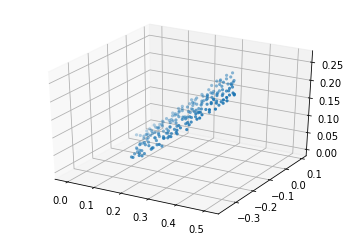

In [7]:
ax = plt.gca(projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], s=10, edgecolor='none')
plt.show()

In [8]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
# fit_transform means fit the model to training data and use the fitted model to transform the data,
# return the results.
transformed_data = pca.fit_transform(data)

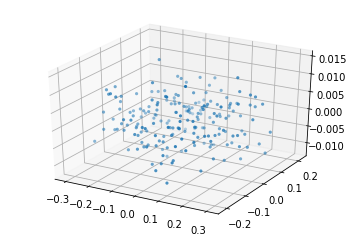

In [12]:
ax = plt.gca(projection='3d')
ax.scatter3D(transformed_data[:,0], transformed_data[:,1], transformed_data[:,2], s=10, edgecolor='none')
plt.show()

Text(0,0.5,'PC-2')

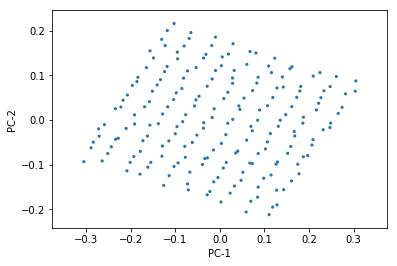

In [19]:
plt.scatter(transformed_data[:,0], transformed_data[:,1], s=10, edgecolor='none')
_ = plt.axis('equal')
plt.xlabel("PC-1")
plt.ylabel("PC-2")

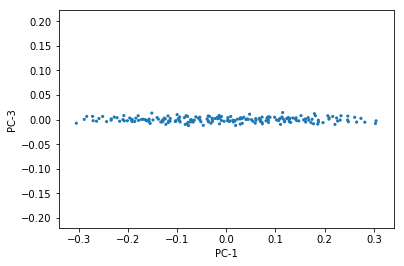

In [44]:
plt.scatter(transformed_data[:,0], transformed_data[:,2], s=10, edgecolor='none')
_ = plt.axis('equal')
plt.xlabel("PC-1")
plt.ylabel("PC-3")
plt.show()

Now each data sample is mainly represented by two "components" discovered by PCA. Compared to the first two components, the 3rd one has little variation. We often discard such components in the new data representation -- the technique is called Dimension Reduction.

- The hope is that the main components represents the primary variation in the data
    - As in the example above: we know there are two latent factors (known as the experiment designer, not as the data analyser), and PCA returns two factor that "spans" the distribution of the data -- this is often called "subspace" assumption.

__Q__
- Please plot the PCA-resulted factors, factor-2 v.s. factor-3.
- Discuss: if factor-1 and -2 reproduces the latent factors that had been used to generate the data, then what does factor-3 represent?
    - HINT: refer to the `x = ...; y = ...; z = ...` statements in the data generation codes. -- We will make use of this property of PCA later to recover contaminated signals.


### When subspace models stop working
Let us try a factor that affects the data generation in a highly nonlinear way, e.g.

$x_1(t) = t \cos(t)$ and $x_2(t) = t \sin(t)$

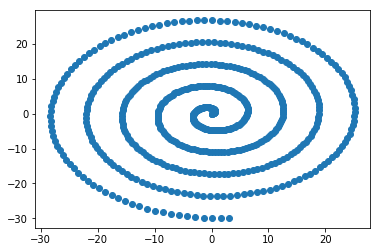

In [38]:
# Generate t - x1, x2
t = np.arange(0, 30, 0.05)
x_1 = t * np.cos(t)
x_2 = t * np.sin(t)
plt.scatter(x_1, x_2)

pca_model_t = PCA(n_components=1)
pca_t = pca_model_t.fit_transform( np.vstack((x_1, x_2)).T )

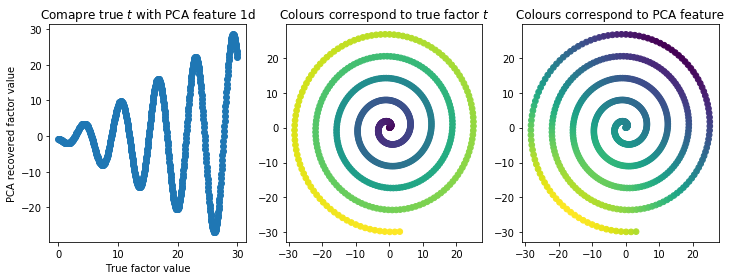

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(t, pca_t)
plt.xlabel('True factor value')
plt.ylabel('PCA recovered factor value')
plt.title('Comapre true $t$ with PCA feature 1d')
plt.subplot(1,3,2)
plt.scatter(x_1, x_2, c=t, s=32)
plt.title('Colours correspond to true factor $t$')
plt.subplot(1,3,3)
plt.scatter(x_1, x_2, c=pca_t.squeeze(), s=32)
plt.title('Colours correspond to PCA feature')
plt.show()

## Non-fully supervised settings
- May or may not or partially require target value information
- Entering the realm of unsupervised / semi- supervised / reinforcement learning

In [26]:
%%HTML
<video controls="controls" width="600"><source type="video/mp4" src="ref/1-iter10K.mp4"></source></video>

In [30]:
%%HTML
<video controls="controls" width="600"><source type="video/mp4" src="ref/2-iter1M.mp4"></source></video>

In [32]:
%%HTML
<video controls="controls" width="600"><source type="video/mp4" src="ref/3-iter7M.mp4"></source></video>

# Lab Exercise

Recover corrupted signal using PCA representation. Given a set of data samples, let's say, one of them has been corrupted badly. How to use the principal components of the data to partially recover the signal?

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
def imshow_gray(im):
    plt.imshow(im.reshape((64, 64)), cmap='gray', interpolation='nearest')
    
rng = np.random.RandomState(0)
dataset = fetch_olivetti_faces(data_home="./data", 
                               shuffle=True, 
                               random_state=42)
X = dataset.data

# Setting up the experiment
NOISE_LEVEL = 0.2
NOISE_MAG   = 0.5
TEST_SAMPLE_ID = 5
GAUSSIAN_NOISE = False
# ~ 20% observed attributes of the sample in question 
# has been destroyed (GAUSSIAN_NOISE is a flag controlling the 
# noise setting)
n_samples, n_pixels = X.shape
original_test = X[TEST_SAMPLE_ID].copy()
corrupt_idx = rng.rand(n_pixels)<NOISE_LEVEL
noise_std = NOISE_MAG * np.std(X)
corrupted_test = X[TEST_SAMPLE_ID]
if GAUSSIAN_NOISE:
    corrupted_test[corrupt_idx] += \
        rng.randn(np.count_nonzero(corrupt_idx)) * noise_std
else:
    corrupted_test[corrupt_idx] = 0
X = np.concatenate( (X[:TEST_SAMPLE_ID, :], X[(TEST_SAMPLE_ID+1):, :]), axis=0 )

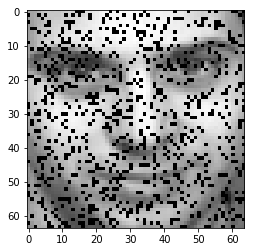

In [37]:
# Here is the corrupted image, you can generate others by changing the TEST_SAMPLE_ID in the above code block.
imshow_gray(corrupted_test)

## SOLUTION BELOW
Try by yourself before refer to the solution, and consider:
- what is the pros/cons of this method of recovering signals?
- where is the origin of information the algorithm employed to fill the "gaps"?
- what is the limit of the algorithm.

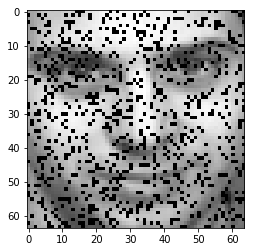

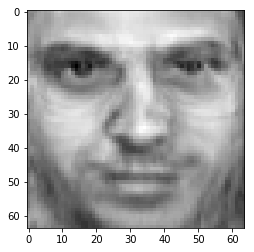

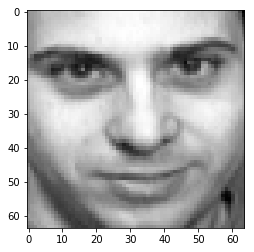

In [52]:
# Solution
MAIN_COMPONENTS = 50
#m = np.mean(X, axis=0)
pca = PCA(n_components=MAIN_COMPONENTS)
pc = pca.fit_transform(X)
corr_pc = pca.transform(corrupted_test[np.newaxis, :])
re_corr = pca.inverse_transform(corr_pc)

imshow_gray(corrupted_test)
plt.show()
imshow_gray(re_corr)
plt.show()
imshow_gray(original_test)